In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Loading in the Haar Cascade for license plates
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

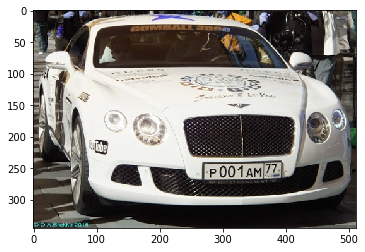

In [4]:
#Reading in the license plate image
plate = cv2.imread('car_plate2.jpg') #the zero is importing the photo in grayscale
plt.imshow(plate) #notice the colouring is different

In [5]:
#Function to change the colour scaling
def display(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

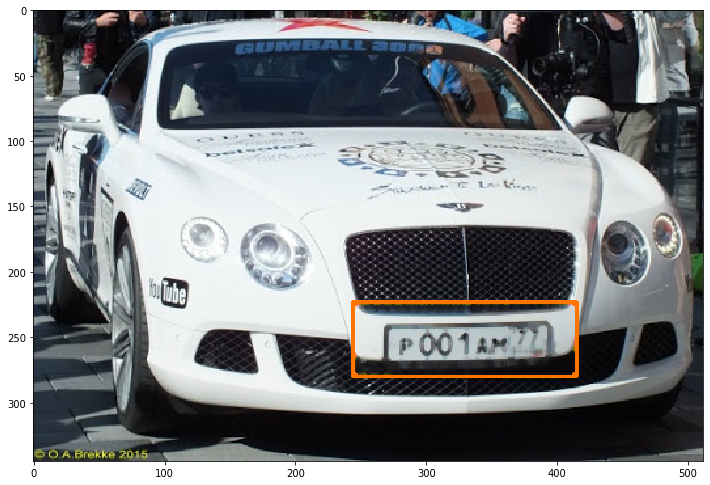

In [6]:
#Creating a function to utilize the Haar Cascade and create a rectangle around the detected license plate, then blur it
def detect_and_blur_plate(img):

    plate_img = img.copy()
    plate_rectangle = plate_cascade.detectMultiScale(image = plate_img, scaleFactor = 1.3, minNeighbors = 5) 
    
    for (x,y,w,h) in plate_rectangle: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,117,255), 2) #creating a rectangle around the detected license plate
        roi = plate_img[y:y+h, x:x+w]
        roi = cv2.medianBlur(src = roi, ksize = 5) 
        plate_img[y:y+h, x:x+w] = roi #replacing the region of the license plate in the original image with the blurred ROI
        
    return plate_img

display(detect_and_blur_plate(plate))